## CNN for Fashion MNIST dataset  

### Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define a transformation and remove the .normalize transform

transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load dataset
dataset = datasets.FashionMNIST(root='/root/data', train=True, download=True, transform=transform)

# Create DataLoader with multiple workers
dataloader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=2)

100%|██████████| 26.4M/26.4M [00:02<00:00, 13.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 211kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.89MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.37MB/s]


In [3]:
import torch
def mean_std(dataloader):
    #finding mean and std for input images

    summ_means, squared_sum_mean, num_batches= 0, 0, 0
    num_batches = len(dataloader)

    for data,label in dataloader:
        # Mean over batch, height and width, but not over the channels
        summ_means += torch.mean(data) #sum of means for all batches
        squared_sum_mean += torch.mean(data**2) #sum of mean of squares for all batches

    mean_gray = summ_means / len(dataloader) #num_batches = len(dataloader)

    # std = sqrt(E[X^2] - (E[X])^2)
    std_gray = (squared_sum_mean / num_batches - mean_gray ** 2) ** 0.5
    print("Mean is ",mean_gray.item()," STD is ",std_gray.item())
    return mean_gray,std_gray
mean_std(dataloader)

Mean is  0.2860111892223358  STD is  0.35301080346107483


(tensor(0.2860), tensor(0.3530))

In [4]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define a transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.286,), (0.353,))
])

# Load dataset
train_dataset = datasets.FashionMNIST(root='/root/data', train=True, download=True, transform=transform)

# Create DataLoader with multiple workers
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
#len(train_dataloader.dataset)
test_dataset = datasets.FashionMNIST(root='/root/data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

### Adding validtion dataset

In [5]:
# split the training dataset into training and validation datasets
train_dataset,valid_dataset = torch.utils.data.random_split(train_dataset,[50000,10000])

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=64, shuffle=True)

print(f"Training dataset size: {len(train_dataloader.dataset)}")
print(f"Validation dataset size: {len(valid_loader.dataset)}")

Training dataset size: 50000
Validation dataset size: 10000


### Let's recap From last session (NN)

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init


# Define your neural network architecture
class NeuralNet(nn.Module): #inheretence concept
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.flatten = nn.Flatten()
        self.relu = nn.ReLU() #whether you will use this many times or not , Define it once
        self.fc1 = nn.Linear(784, 256) # Common approach 2^n

        init.uniform_(self.fc1.weight,a=0.1, b=1.1)
        init.zeros_(self.fc1.bias)

        self.fc2 = nn.Linear(256, 10) #why 10 ?
        init.xavier_uniform_(self.fc2.weight, gain=1.1)



    def forward(self, x):
        x = self.flatten(x) # 28x28 --> 784
        x = self.fc1(x)   # 784 --> 256
        x = self.relu(x)
        x = self.fc2(x) # 256-->10 #Is dependent on the loss you will use
        #x = torch.softmax(x, dim=1)
        return x


# Instantiate the neural network
model_NN = NeuralNet()





### Simple CNN:

In [28]:
class ConvNet(nn.Module):
    def __init__(self):
        # We optimize dropout rate in a convolutional neural network.
        super(ConvNet, self).__init__()

        self.conv1 = nn.Conv2d(in_channels = 1, out_channels=16, kernel_size=3, stride=1, padding= 1)
        ## ToDo: Create another convolution layer  that generates 32 Feature maps name it self.conv2
        self.conv2 = nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,stride=1,padding=1)

        self.drop2D=nn.Dropout2d(p=0.2)
        self.drop1D=nn.Dropout1d(p=0.2)

        ## ToDo: Create a MaxPool Layer of size (2,2) name it self.pool
        self.pool = nn.MaxPool2d(kernel_size = 2)

        self.fc1 = nn.Linear(32*7*7, 256)
        self.fc2 = nn.Linear(256, 10) # 10 classes

    def forward(self, x):
        x = F.relu(self.pool(self.conv1(x)))  # 1 x 28 x 28 ->  16 x 28 x 28 ->  16 x 14 x 14
        x = F.relu(self.pool(self.conv2(x)))  # 16 x 14 x 14  -->  32 x 14 x 14 ->  32 x 7 x 7
        x = self.drop2D(x)

        x = x.view(x.size(0),-1)             #7x7x32-->1568

        x = F.relu(self.fc1(x))              #1568
        x = self.drop1D(x)

        x = self.fc2(x)                      #256--> 10

        return x

# Instantiate the neural network
model_CNN = ConvNet()




### Let's recap From last session (Training loop)
Use the following training loop to train both NNs and CNNs

Epoch 1: Training Loss = 832.2097118556347
Epoch 1: Validation Loss = 112.3233669639393
Epoch 2: Training Loss = 80.73327395312316
Epoch 2: Validation Loss = 47.04220751744167
Epoch 3: Training Loss = 43.77068961977654
Epoch 3: Validation Loss = 33.82154546801452
Epoch 4: Training Loss = 32.54409633877942
Epoch 4: Validation Loss = 21.472123278933726
Epoch 5: Training Loss = 22.85354282102926
Epoch 5: Validation Loss = 14.96598362846739
Epoch 6: Training Loss = 18.297530949115753
Epoch 6: Validation Loss = 75.4565754908665
Epoch 7: Training Loss = 16.65227059223463
Epoch 7: Validation Loss = 13.980676553811238
Epoch 8: Training Loss = 13.12299945653247
Epoch 8: Validation Loss = 12.870891378184034
Epoch 9: Training Loss = 12.034388629066974
Epoch 9: Validation Loss = 9.15411152353712
Epoch 10: Training Loss = 10.191817523725808
Epoch 10: Validation Loss = 8.342858300846853


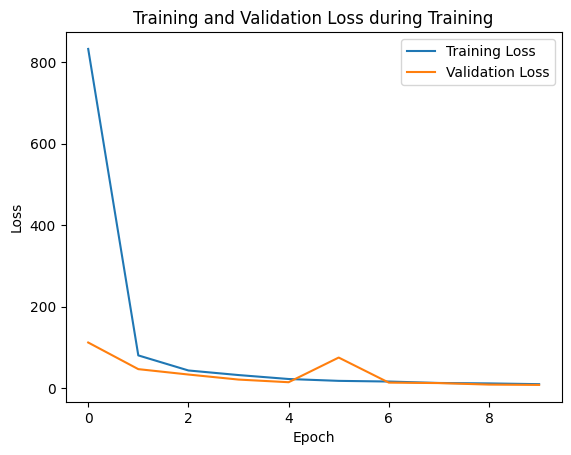

Epoch 1: Training Loss = 1.2541663084950898
Epoch 1: Validation Loss = 0.6911273351900137
Epoch 2: Training Loss = 0.9391914771493438
Epoch 2: Validation Loss = 0.6336571097753609
Epoch 3: Training Loss = 0.8665588293843867
Epoch 3: Validation Loss = 0.47541937763523906
Epoch 4: Training Loss = 0.8235336797088003
Epoch 4: Validation Loss = 0.5982686994941371
Epoch 5: Training Loss = 0.7945384918271429
Epoch 5: Validation Loss = 0.42682187126320636
Epoch 6: Training Loss = 0.7772584524758331
Epoch 6: Validation Loss = 0.3829770553263889
Epoch 7: Training Loss = 0.7622556164670173
Epoch 7: Validation Loss = 0.36668436912594327
Epoch 8: Training Loss = 0.7437027887919979
Epoch 8: Validation Loss = 0.3653947883730481
Epoch 9: Training Loss = 0.7421374510011405
Epoch 9: Validation Loss = 0.3576159565501912
Epoch 10: Training Loss = 0.7359350413236472
Epoch 10: Validation Loss = 0.3360067748340072


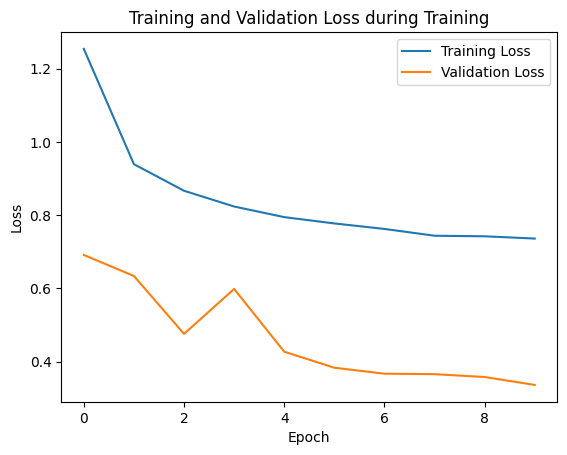

In [30]:
import matplotlib.pyplot as plt

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss() #Classification or regression?

for model in [model_NN,model_CNN]:
  # Train the neural network
  Epochs = 10
  training_losses = []
  validation_losses = []
  best_val_loss = float('inf') #A very big number approaching infinity
  optimizer = optim.SGD(model.parameters(), lr=0.01)


  for epoch in range(Epochs): # 10  Epochs
      # ToDo: put the model in the training mode
      #✍️✍️✍️
      model.train()
      running_loss = 0.0
      valid_loss = 0.0
      for inputs, labels in train_dataloader: #looping the batches


          # Zero the gradients
          optimizer.zero_grad()  #ensures that the gradients are cleared or reset to zero before the next forward-backward pass.

          # Forward pass
          outputs = model(inputs)
          loss = criterion(outputs, labels)

          # Backward pass and optimization
          loss.backward() #calculate the gradients
          #update our weights of each Batch
          optimizer.step()

          running_loss += loss.item() #accumulating losses over batches

      total_loss = running_loss/len(train_dataloader)
      training_losses.append(total_loss)
      print(f"Epoch {epoch+1}: Training Loss = {total_loss}") # Batch loss=Total losses/number of batches

      model.eval()
      for inputs, labels in valid_loader: #looping the batches


          # Forward pass
          outputs = model(inputs)
          loss = criterion(outputs, labels)

          valid_loss += loss.item() #accumulating losses over batches

      total_loss = valid_loss/len(valid_loader)
      validation_losses.append(total_loss)
      print(f"Epoch {epoch+1}: Validation Loss = {total_loss}") # Batch loss=Total losses/number of batches
      if total_loss < best_val_loss:
        best_val_loss = total_loss
        best_state_dict = model.state_dict()


  torch.save(best_state_dict, f'best_model{type(model).__name__}.pth')

  #Plot traing and validation losses saved in the training loops
  plt.plot(training_losses, label='Training Loss')
  plt.plot(validation_losses, label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss during Training')
  plt.legend()
  plt.show()

In [31]:

# Define a dictionary of model names and classes
model_classes = {
    "NeuralNet": model_NN,
    "ConvNet": model_CNN
}


for model_name, model_class in model_classes.items():
    # Step 1: Instantiate the model
    model = model_class

    # Step 2: Load the saved weights
    model.load_state_dict(torch.load(f"best_model{model_name}.pth"))

    # Step 3: Move model to device and set to eval mode
    model.eval()

    # Step 4: Run inference on test data
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy = 100 * correct / total
    print(f"{model_name} Test Accuracy: {accuracy:.2f}%")


NeuralNet Test Accuracy: 26.22%
ConvNet Test Accuracy: 87.36%


### ✍️ToDo: Training is too slow, suggest how to solve this problem

In [32]:
import torch

# ✍️Check if CUDA is available
device = "cuda" if torch.cuda.is_available() else "cpu"
# ✍️Move the model to the GPU if CUDA is available

print(device)

cuda


Epoch 1: Training Loss = 9.712590816228285
Epoch 1: Validation Loss = 42.21772339465512
Epoch 2: Training Loss = 9.172381502892964
Epoch 2: Validation Loss = 12.440446148252791
Epoch 3: Training Loss = 8.203957397309715
Epoch 3: Validation Loss = 7.915059223296536
Epoch 4: Training Loss = 7.793265465427847
Epoch 4: Validation Loss = 7.329720638360188
Epoch 5: Training Loss = 6.990303531022328
Epoch 5: Validation Loss = 9.915821946350633
Epoch 6: Training Loss = 7.010708624597096
Epoch 6: Validation Loss = 5.426013811378722
Epoch 7: Training Loss = 6.509186789812639
Epoch 7: Validation Loss = 5.09984637141987
Epoch 8: Training Loss = 6.3962050299815205
Epoch 8: Validation Loss = 6.772422062363594
Epoch 9: Training Loss = 5.767193632510007
Epoch 9: Validation Loss = 7.409894274298552
Epoch 10: Training Loss = 5.951370484841144
Epoch 10: Validation Loss = 5.628145015923081


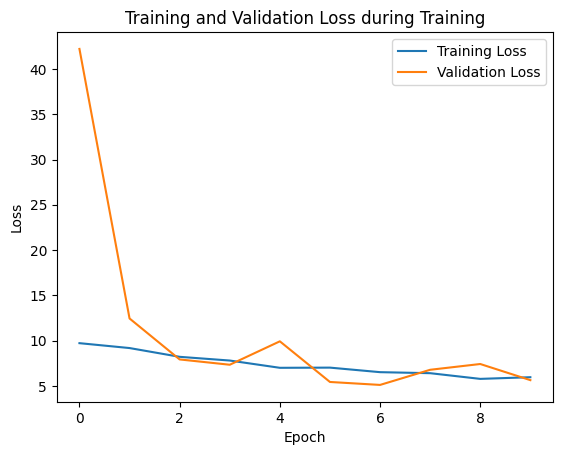

Epoch 1: Training Loss = 0.7203190994384648
Epoch 1: Validation Loss = 0.32906351395093714
Epoch 2: Training Loss = 0.7233267152477103
Epoch 2: Validation Loss = 0.3478976886743193
Epoch 3: Training Loss = 0.7090708571093162
Epoch 3: Validation Loss = 0.3237407722860385
Epoch 4: Training Loss = 0.7099731501258547
Epoch 4: Validation Loss = 0.3320393947659025
Epoch 5: Training Loss = 0.6984070508605074
Epoch 5: Validation Loss = 0.29743503508674113
Epoch 6: Training Loss = 0.692652622604614
Epoch 6: Validation Loss = 0.3040261829070225
Epoch 7: Training Loss = 0.6859150489654078
Epoch 7: Validation Loss = 0.30666655415941957
Epoch 8: Training Loss = 0.6854262981954438
Epoch 8: Validation Loss = 0.33061124745068277
Epoch 9: Training Loss = 0.6803902453168884
Epoch 9: Validation Loss = 0.33992873056299366
Epoch 10: Training Loss = 0.6753800680189181
Epoch 10: Validation Loss = 0.2779234923944352


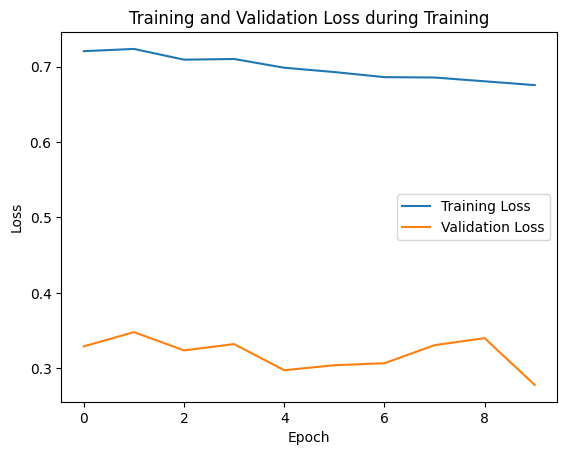

In [33]:
import matplotlib.pyplot as plt

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss() #Classification or regression?

for model in [model_NN,model_CNN]:
  # Train the neural network
  Epochs = 10
  training_losses = []
  validation_losses = []
  best_val_loss = float('inf') #A very big number approaching infinity
  model.to(device)
  optimizer = optim.SGD(model.parameters(), lr=0.01)

  for epoch in range(Epochs): # 10  Epochs
      #✍️✍️✍️
      model.train()
      running_loss = 0.0
      valid_loss = 0.0
      for inputs, labels in train_dataloader: #looping the batches
          #✍️
          inputs, labels = inputs.to(device), labels.to(device)

          # Zero the gradients
          optimizer.zero_grad()  #ensures that the gradients are cleared or reset to zero before the next forward-backward pass.

          # Forward pass
          outputs = model(inputs)
          loss = criterion(outputs, labels)

          # Backward pass and optimization
          loss.backward() #calculate the gradients
          #update our weights of each Batch
          optimizer.step()

          running_loss += loss.item() #accumulating losses over batches

      total_loss = running_loss/len(train_dataloader)
      training_losses.append(total_loss)
      print(f"Epoch {epoch+1}: Training Loss = {total_loss}") # Batch loss=Total losses/number of batches

      model.eval()
      for inputs, labels in valid_loader: #looping the batches
          #✍️
          inputs, labels = inputs.to(device), labels.to(device)
          # Forward pass
          outputs = model(inputs)
          loss = criterion(outputs, labels)

          valid_loss += loss.item() #accumulating losses over batches

      total_loss = valid_loss/len(valid_loader)
      validation_losses.append(total_loss)
      print(f"Epoch {epoch+1}: Validation Loss = {total_loss}") # Batch loss=Total losses/number of batches
      if total_loss < best_val_loss:
        best_val_loss = total_loss
        best_state_dict = model.state_dict()


  torch.save(best_state_dict, f'best_model{type(model).__name__}.pth')

  #Plot traing and validation losses saved in the training loops
  plt.plot(training_losses, label='Training Loss')
  plt.plot(validation_losses, label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss during Training')
  plt.legend()
  plt.show()

In [34]:

# Define a dictionary of model names and classes
model_classes = {
    "NeuralNet": model_NN,
    "ConvNet": model_CNN
}


for model_name, model_class in model_classes.items():
    # Step 1: Instantiate the model
    model = model_class
    model.to(device)
    # Step 2: Load the saved weights
    model.load_state_dict(torch.load(f"best_model{model_name}.pth"))

    # Step 3: Move model to device and set to eval mode
    model.eval()

    # Step 4: Run inference on test data
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy = 100 * correct / total
    print(f"{model_name} Test Accuracy: {accuracy:.2f}%")


NeuralNet Test Accuracy: 27.83%
ConvNet Test Accuracy: 89.21%


### ✍️ToDO: Try an a more complex architecture of 3 Convolution layers and 3 Fully connected layers

In [35]:
class ConvNet(nn.Module):
    def __init__(self):
        # We optimize dropout rate in a convolutional neural network.
        super(ConvNet, self).__init__()

        self.conv1 = nn.Conv2d(in_channels = 1, out_channels=16, kernel_size=3, stride=1, padding= 1)
        ## ToDo: Create another convolution layer  that generates 32 Feature maps name it self.conv2
        self.conv2 = nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,stride=1,padding=1)
        self.conv3 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,stride=1,padding=1)


        self.drop2D=nn.Dropout2d(p=0.2)
        self.drop1D=nn.Dropout1d(p=0.2)

        ## ToDo: Create a MaxPool Layer of size (2,2) name it self.pool
        self.pool = nn.MaxPool2d(kernel_size = 2)

        self.fc1 = nn.Linear(64*3*3, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10) # 10 classes

    def forward(self, x):
        x = F.relu(self.pool(self.conv1(x)))  # 1 x 28 x 28 ->  16 x 28 x 28 ->  16 x 14 x 14
        x = F.relu(self.pool(self.conv2(x)))  # 16 x 14 x 14  -->  32 x 14 x 14 ->  32 x 7 x 7
        x = self.drop2D(x)
        x = F.relu(self.pool(self.conv3(x)))  # 32 x 7 x 7  -->  64 x 7 x 7 ->  64 x 3 x 3

        x = x.view(x.size(0),-1)             #64 x 3 x 3--> 576

        x = F.relu(self.fc1(x))              #576  -> 256
        x = self.drop1D(x)

        x =  F.relu(self.fc2(x))                      #256--> 128
        x =  F.relu(self.fc3(x))                      #128--> 10

        return x

# Instantiate the neural network
model = ConvNet()

model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss() #Classification or regression?
optimizer = optim.SGD(model.parameters(), lr=0.01)

### ✍️ToDO: Train the new model

In [36]:


# Train the neural network
Epochs = 10
training_losses = []
validation_losses = []
best_val_loss = float('inf') #A very big number approaching infinity


for epoch in range(Epochs): # 10  Epochs

    model.train()
    running_loss = 0.0
    valid_loss = 0.0
    for inputs, labels in train_dataloader: #looping the batches

        #✍️
        inputs, labels = inputs.to(device), labels.to(device)
        # Zero the gradients
        optimizer.zero_grad()  #ensures that the gradients are cleared or reset to zero before the next forward-backward pass.

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward() #calculate the gradients
        #update our weights of each Batch
        optimizer.step()

        running_loss += loss.item() #accumulating losses over batches

    total_loss = running_loss/len(train_dataloader)
    training_losses.append(total_loss)
    print(f"Epoch {epoch+1}: Training Loss = {total_loss}") # Batch loss=Total losses/number of batches

    model.eval()
    for inputs, labels in valid_loader: #looping the batches
        #✍️
        inputs, labels = inputs.to(device), labels.to(device)
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        valid_loss += loss.item() #accumulating losses over batches

    total_loss = valid_loss/len(valid_loader)
    validation_losses.append(total_loss)
    print(f"Epoch {epoch+1}: Validation Loss = {total_loss}") # Batch loss=Total losses/number of batches
    if total_loss < best_val_loss:
      best_val_loss = total_loss
      best_state_dict = model.state_dict()

torch.save(best_state_dict, 'best_model.pth')

Epoch 1: Training Loss = 2.296517341338155
Epoch 1: Validation Loss = 2.2801613974723085
Epoch 2: Training Loss = 2.085099888427178
Epoch 2: Validation Loss = 1.7061845094535002
Epoch 3: Training Loss = 1.5813897773432914
Epoch 3: Validation Loss = 1.1729470787534289
Epoch 4: Training Loss = 1.3242542487581064
Epoch 4: Validation Loss = 1.0631337560665834
Epoch 5: Training Loss = 1.275166483791283
Epoch 5: Validation Loss = 1.021357641478253
Epoch 6: Training Loss = 1.2354637943875149
Epoch 6: Validation Loss = 0.9645968709781672
Epoch 7: Training Loss = 1.2069148078294056
Epoch 7: Validation Loss = 1.0457292058665282
Epoch 8: Training Loss = 1.1861513403370558
Epoch 8: Validation Loss = 0.9152345877544136
Epoch 9: Training Loss = 1.1676686892424093
Epoch 9: Validation Loss = 0.911430296624542
Epoch 10: Training Loss = 1.1536022128961276
Epoch 10: Validation Loss = 0.8635503993292523


### ✍️ToDO: Test the new model

In [37]:
# prompt: ### Test model accuracy using the test dataset

# ToDo: put the model in evaluation mode
model.eval()

correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy of the model on the {total} test images: {accuracy:.2f}%")

Accuracy of the model on the 10000 test images: 65.72%


### Applying batch Normalization to your model

In [38]:
class ConvNet(nn.Module):
    def __init__(self):
        # We optimize dropout rate in a convolutional neural network.
        super(ConvNet, self).__init__()

        self.conv1 = nn.Conv2d(in_channels = 1, out_channels=16, kernel_size=3, stride=1, padding= 1)
        self.bn1 = nn.BatchNorm2d(16)  # Batch normalization for 16 feature maps
        self.conv2 = nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,stride=1,padding=1)
        self.bn2 = nn.BatchNorm2d(32)  # Batch normalization for 32 feature maps
        self.conv3 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,stride=1,padding=1)
        self.bn3 = nn.BatchNorm2d(64)  # Batch normalization for 64 feature maps

        self.drop2D=nn.Dropout2d(p=0.2)
        self.drop1D=nn.Dropout1d(p=0.2)

        ## ToDo: Create a MaxPool Layer of size (2,2) name it self.pool
        self.pool = nn.MaxPool2d(kernel_size = 2)

        self.fc1 = nn.Linear(64*3*3, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10) # 10 classes

    def forward(self, x):
        x = F.relu(self.bn1(self.pool(self.conv1(x))))  # 1 x 28 x 28 ->  16 x 28 x 28 ->  16 x 14 x 14
        x = F.relu(self.bn2(self.pool(self.conv2(x))))  # 16 x 14 x 14  -->  32 x 14 x 14 ->  32 x 7 x 7
        x = self.drop2D(x)
        x = F.relu(self.bn3(self.pool(self.conv3(x))))  #32 x 7 x 7 -> 64 x 7 x 7  ->  64 x 3 x 3

        x = x.view(x.size(0),-1)              #64 x 3 x 3 --> 576

        x = F.relu(self.fc1(x))              #576 -> 256
        x = self.drop1D(x)
        x = F.relu(self.fc2(x))              #256 -> 64

        x = self.fc3(x)                      #64--> 10

        return x

# Instantiate the neural network
model = ConvNet()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss() #Classification or regression?
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [39]:
import torch

# ✍️Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✍️Move the model to the GPU if CUDA is available
model.to(device)

# Train the neural network
Epochs = 10
training_losses = []
validation_losses = []
best_val_loss = float('inf') #A very big number approaching infinity


for epoch in range(Epochs): # 10  Epochs

    model.train()
    running_loss = 0.0
    valid_loss = 0.0
    for inputs, labels in train_dataloader: #looping the batches

        #✍️
        inputs, labels = inputs.to(device), labels.to(device)
        # Zero the gradients
        optimizer.zero_grad()  #ensures that the gradients are cleared or reset to zero before the next forward-backward pass.

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward() #calculate the gradients
        #update our weights of each Batch
        optimizer.step()

        running_loss += loss.item() #accumulating losses over batches

    total_loss = running_loss/len(train_dataloader)
    training_losses.append(total_loss)
    print(f"Epoch {epoch+1}: Training Loss = {total_loss}") # Batch loss=Total losses/number of batches

    model.eval()
    for inputs, labels in valid_loader: #looping the batches
        #✍️
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        valid_loss += loss.item() #accumulating losses over batches

    total_loss = valid_loss/len(valid_loader)
    validation_losses.append(total_loss)
    print(f"Epoch {epoch+1}: Validation Loss = {total_loss}") # Batch loss=Total losses/number of batches
    if total_loss < best_val_loss:
      best_val_loss = total_loss
      best_state_dict = model.state_dict()

torch.save(best_state_dict, 'best_model.pth')

Epoch 1: Training Loss = 1.4338490668007784
Epoch 1: Validation Loss = 0.6556332627679132
Epoch 2: Training Loss = 0.8813474107047786
Epoch 2: Validation Loss = 0.47127134500035817
Epoch 3: Training Loss = 0.7906490657335657
Epoch 3: Validation Loss = 0.4057607495101394
Epoch 4: Training Loss = 0.752997128936031
Epoch 4: Validation Loss = 0.4119446362089959
Epoch 5: Training Loss = 0.7254874123560499
Epoch 5: Validation Loss = 0.347077612379554
Epoch 6: Training Loss = 0.7144137763839853
Epoch 6: Validation Loss = 0.3622350184021482
Epoch 7: Training Loss = 0.7041736037072623
Epoch 7: Validation Loss = 0.2992288454133234
Epoch 8: Training Loss = 0.6963025869996956
Epoch 8: Validation Loss = 0.31994007091233684
Epoch 9: Training Loss = 0.6829366558957892
Epoch 9: Validation Loss = 0.3082579781010652
Epoch 10: Training Loss = 0.6767756546778447
Epoch 10: Validation Loss = 0.30079687220655427


In [41]:
# prompt: ### Test model accuracy using the test dataset

# ToDo: put the model in evaluation mode
model.eval()

correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy of the model on the {total} test images: {accuracy:.2f}%")

Accuracy of the model on the 10000 test images: 87.78%


### Data Augmentation

In [42]:
# Define a transformation
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Define a transformation
train_transform = transforms.Compose([
    transforms.RandomVerticalFlip(0.5),
    transforms.RandomAffine(degrees=10),
    transforms.ToTensor(),
    transforms.Normalize((0.2860,), (0.3530,))
])


# Load dataset
train_dataset = datasets.FashionMNIST(root='/root/data', train=True, download=True, transform=train_transform)
test_dataset = datasets.FashionMNIST(root='/root/data', train=False, download=True, transform=test_transform)


# Create DataLoader with multiple workers
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
#len(train_dataloader.dataset)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)


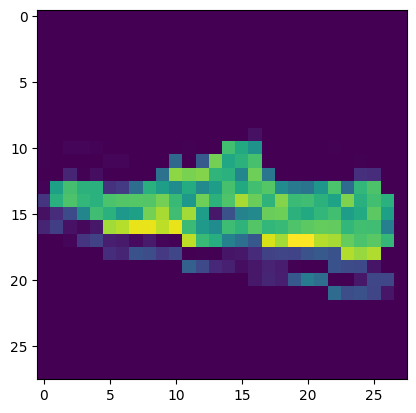

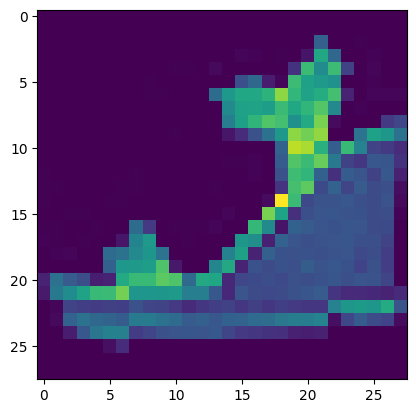

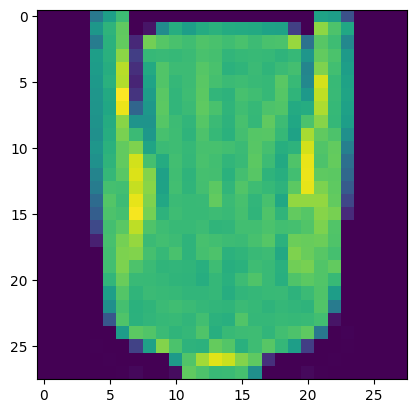

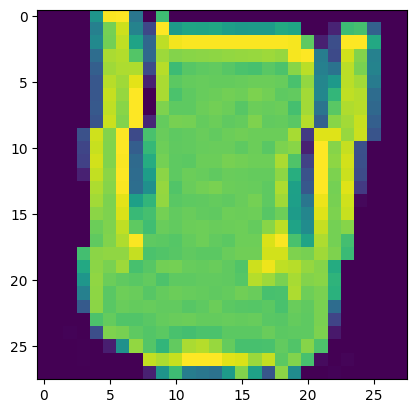

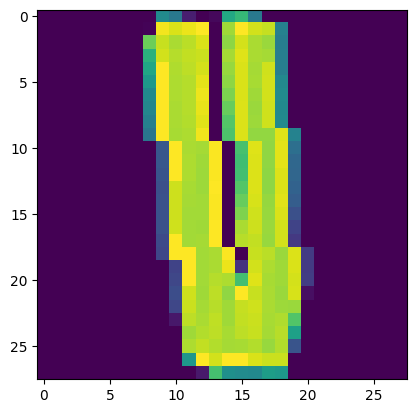

In [43]:

import matplotlib.pyplot as plt
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##



def show_imgs(img_loader,n):

    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:n]
    images = batch[0][0:n]
    for i in range(n):
        label_idx = int(labels[i].detach())


        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()
show_imgs(train_dataloader,5)